In [175]:
import pandas as pd
import numpy as np
import importlib
import util.Data as data_util
import util.DataframeProcess as df_proc
import seaborn as sn
import matplotlib.pyplot as plt

In [176]:
importlib.reload(data_util)
importlib.reload(df_proc)

<module 'util.DataframeProcess' from 'D:\\scul\\uaic-ub\\licenta\\code\\util\\DataframeProcess.py'>

# Data

In [177]:
csv_filename = r'../data_db/final_coordinates-conversion-v2.csv'
df_main = data_util.import_data(csv_filename)

In [178]:
df_data = df_main.copy()
df_data.shape

(1827, 26)

In [179]:
df_data['title'].unique().size

61

## Split wm and reward

In [180]:
df_data = df_main.copy()
mask_wm = df_data['keywords'].str.contains('working memory')

### Working Memory

In [181]:
df_wm = df_data[mask_wm]

In [182]:
df_wm['title'].unique().size

17

In [183]:
df_wm_proc = df_proc.df_process(df_wm)
df_wm_proc.head(1)

,title,author,Number of Foci,Number of Subjects,contrast_set,keywords_split
0,A Rapid fMRI Task Battery for Mappin...,Drobyshevsky et al,13,31,{2-back > 0-back},"{n-back task, talairach, two-back ta..."


### Contrast wm

In [184]:
list_contrast_wm = list(df_proc.list_of_sets_to_set(df_wm_proc, 'contrast_set'))
counter_contrast_wm = data_util.df_counter(df=df_wm_proc.explode('contrast_set'), column='contrast_set',
                                           set_keywords=list_contrast_wm, order=1)
counter_contrast_wm

{'>nan_values<': 0,
 '1-back > rest': 1,
 '1-back > 2-back': 1,
 'n-back > control task': 1,
 '2-back > 1-back': 1,
 'precue > retrocue': 1,
 'retrocue and precue': 1,
 'sub-id > baseline': 1,
 'sub-dif > baseline': 1,
 'sub-dif > frame-dif': 1,
 'retrocue > precue': 1,
 '2-back > 1-back > 0-back': 2,
 '-': 2,
 '3-back > 0-back': 2,
 '3-back > 2-back > 1-back > 0-back': 2,
 '2-back > 0-back': 6}

In [185]:
# chosen set of contrast
min_val = 1
list_contrast_selection_wm = list(set([key for key in list_contrast_wm if counter_contrast_wm[key] >= min_val]))
# create new col with only selected contrasts
df_wm_proc['selected_contrast'] = df_wm_proc['contrast_set'].apply(
    lambda x: set(x).intersection(list_contrast_selection_wm))

contrast_bool_wm = df_proc.boolean_df(df_wm_proc['selected_contrast'], list_contrast_selection_wm)
contrast_int_wm = contrast_bool_wm.astype(int)
contrast_freq_mat_wm = np.dot(contrast_int_wm.T, contrast_int_wm)

In [186]:
contrast_freq_wm = pd.DataFrame(contrast_freq_mat_wm, columns=list_contrast_selection_wm,
                                index=list_contrast_selection_wm)
# contrast_freq_wm

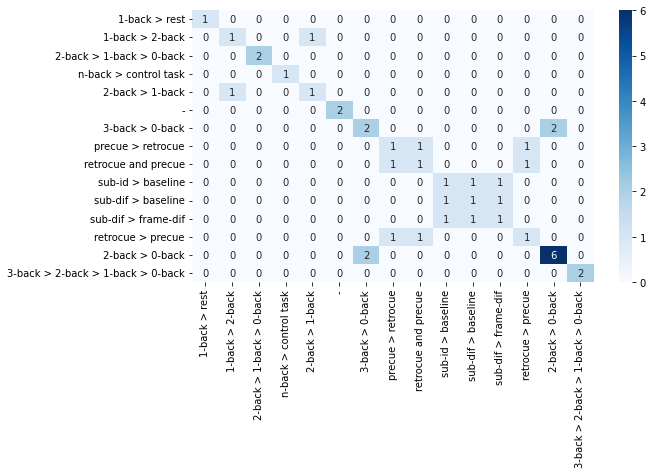

In [187]:
fig, ax = plt.subplots(figsize=(9, 5))
sn.heatmap(contrast_freq_wm, cmap="Blues",annot=True, fmt="d")
# plt.xticks(rotation=50)
plt.savefig("./images/heatmap_contrast_wm.png", dpi=300)

### Keywords wm

In [188]:
counter_keywords_wm = data_util.df_counter(df=df_wm_proc.explode('keywords_split'), column='keywords_split',
                                           set_keywords=df_proc.list_of_sets_to_set(df_wm_proc, 'keywords_split'),
                                           order=1)
counter_keywords_wm

{'>nan_values<': 0,
 'reading': 1,
 'visual faces': 1,
 'retrocue': 1,
 'reward value': 1,
 'precue': 1,
 'reversal learning task': 1,
 'anticipation phase': 1,
 'two and four choice reversal learning task': 1,
 'Sub-Dif': 1,
 'positive reward': 1,
 'visual object': 1,
 'visual spatial cue': 1,
 'negative reward': 1,
 'perceptual matching task': 1,
 'visual scrambled drawings': 1,
 'decision phase': 1,
 'visual shape': 1,
 'visual identical shapes': 1,
 'verbal pseudo-words': 1,
 'visual facial expression': 1,
 'Sub-Id': 1,
 'experimental task': 1,
 'visual shape color': 1,
 'verbal': 1,
 'monetary reward': 2,
 'one-back task': 2,
 'visual word recognition': 2,
 'three-back task': 2,
 'visual numbers': 2,
 'decision making': 3,
 'visual letters': 6,
 'talairach': 7,
 'two-back task': 7,
 'MNI': 10,
 'n-back task': 14,
 'fMRI': 17,
 'working memory': 17}

In [189]:
# chosen set of keywords
# list_keywords = list(df_proc.list_of_sets_to_set(df_wm_proc, 'keywords_split'))
list_keywords = [
    'Sub-Dif',
    'Sub-Id',
    'anticipation phase',
    'decision making',
    'decision phase',
    'monetary reward',
    'n-back task',
    'negative reward',
    'one-back task',
    'positive reward',
    'precue',
    'reading',
    'retrocue',
    'reward value',
    'three-back task',
    'two and four choice reversal learning task',
    'two-back task',
    'verbal',
    'verbal pseudo-words',
    'visual faces',
    'visual facial expression',
    'visual identical shapes',
    'visual letters',
    'visual numbers',
    'visual object',
    'visual scrambled drawings',
    'visual shape',
    'visual shape color',
    'visual spatial cue',
    'visual word recognition']

In [190]:
# Filter the keywords based on min value of appearances
min_val = 2
list_keywords_selection_wm = list(set([key for key in list_keywords if counter_keywords_wm[key] >= min_val]))
# create new col with only selected keywords
df_wm_proc['selected_keywords'] = df_wm_proc['keywords_split'].apply(
    lambda x: set(x).intersection(list_keywords_selection_wm))

keywords_bool_wm = df_proc.boolean_df(df_wm_proc['selected_keywords'], list_keywords_selection_wm)
keywords_int_wm = keywords_bool_wm.astype(int)
keywords_freq_mat_wm = np.dot(keywords_int_wm.T, keywords_int_wm)

In [191]:
keywords_freq_wm = pd.DataFrame(keywords_freq_mat_wm, columns=list_keywords_selection_wm,
                                index=list_keywords_selection_wm)
# keywords_freq_wm

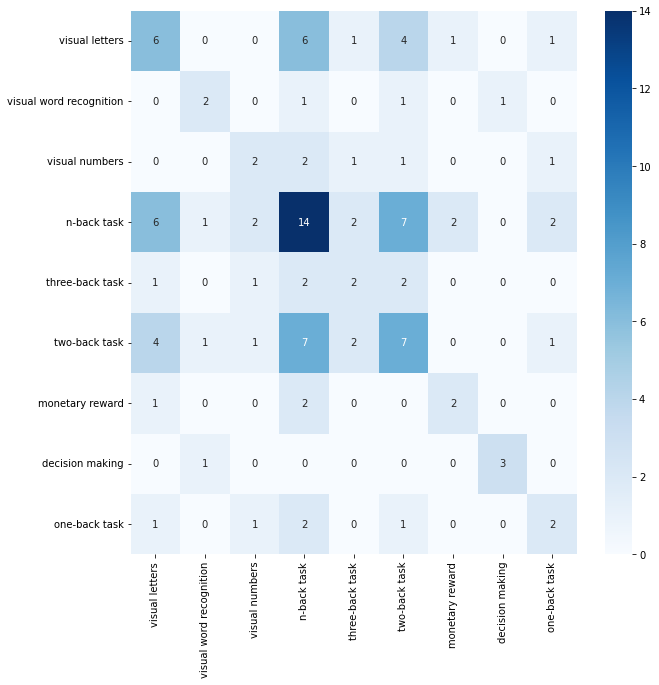

In [192]:
fig, ax = plt.subplots(figsize=(10, 10))
sn.heatmap(keywords_freq_wm, cmap="Blues",annot=True, fmt="d")
plt.savefig("./images/heatmap_keywords_wm.png", dpi=300)

### Keywords and Contrast wm

In [193]:
list_cnt_key_selection_wm = list_contrast_selection_wm + list_keywords_selection_wm
cnt_key_int_wm = pd.merge(contrast_int_wm, keywords_int_wm, left_index=True, right_index=True).astype(int)
cnt_key_freq_mat_wm = np.dot(cnt_key_int_wm.T, cnt_key_int_wm)

In [194]:
cnt_key_freq_wm = pd.DataFrame(cnt_key_freq_mat_wm, columns=list_cnt_key_selection_wm, index=list_cnt_key_selection_wm)

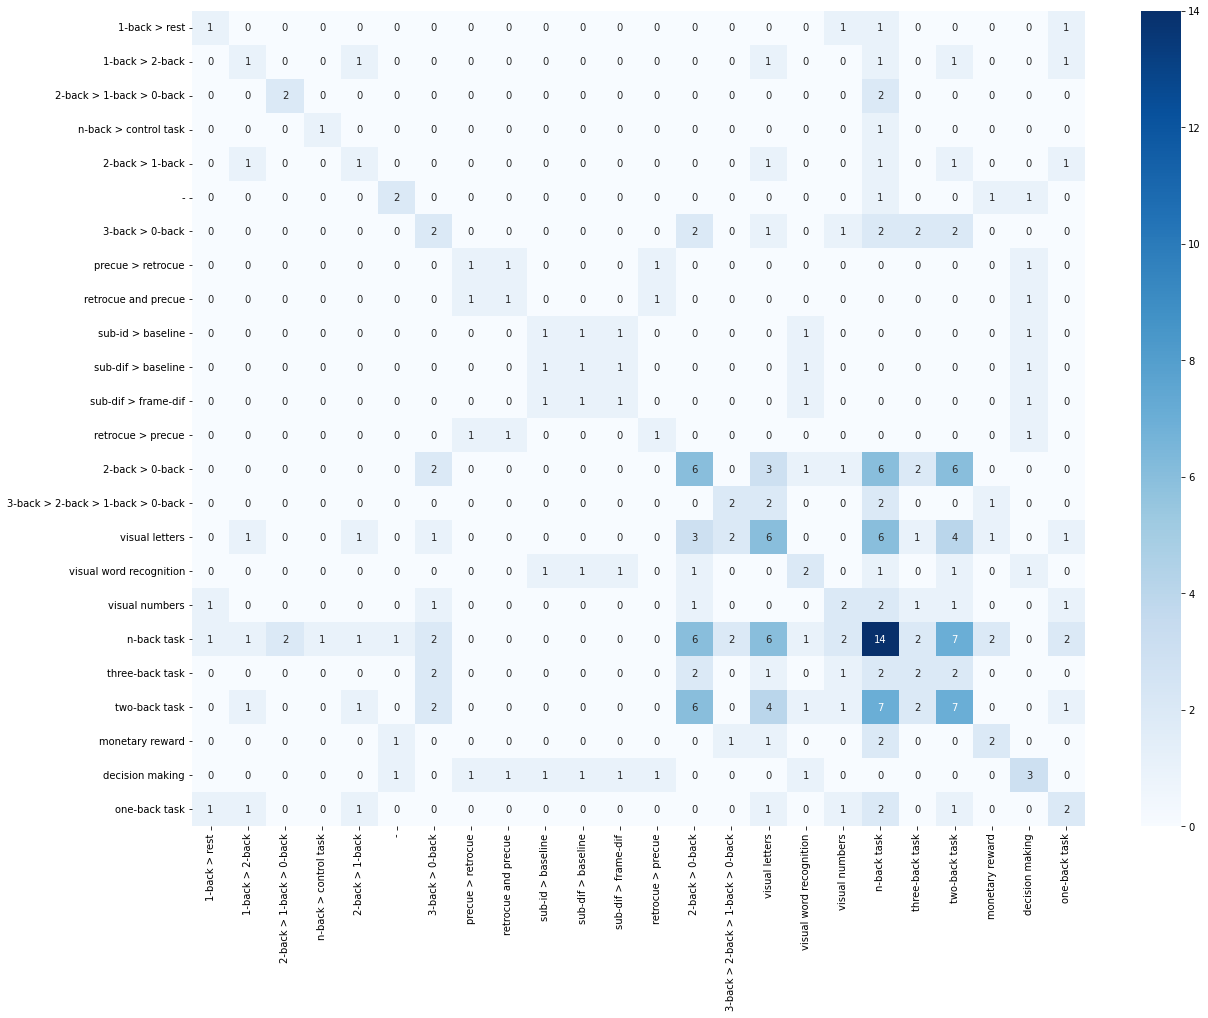

In [195]:
fig, ax = plt.subplots(figsize=(20, 15))
sn.heatmap(cnt_key_freq_wm, cmap="Blues",annot=True, fmt="d")
# plt.xticks(rotation=60)
plt.savefig("./images/heatmap_cnt_key_wm.png", dpi=300)

### Keywords wm - n-back and visual tasks

In [196]:
list_keywords_selection_wm_stimulus = {
    'verbal',
    'verbal pseudo-words',
    'visual faces',
    'visual facial expression',
    'visual identical shapes',
    'visual letters',
    'visual numbers',
    'visual object',
    'visual scrambled drawings',
    'visual shape',
    'visual shape color',
    'visual spatial cue',
    'visual word recognition'
}

In [197]:
df_wm_proc2= df_wm_proc.copy()
df_wm_proc2['selected_keywords_reward_type'] = df_wm_proc2['keywords_split'].apply(
    lambda x: set(el.split(" ")[0] for el in set(x).intersection(list_keywords_selection_wm_stimulus)))

In [198]:
list_keywords_wm_nback = ['n-back task']
list_keywords_wm_stimulus=['verbal','visual']

#### Task Modality N-BACK

In [199]:
df_wm_proc2['selected_key1'] = df_wm_proc2['keywords_split'].apply(
    lambda x: set(x).intersection(list_keywords_wm_nback))

keywords_bool_wm_nback = df_proc.boolean_df(df_wm_proc2['selected_key1'], list_keywords_wm_nback)
keywords_int_wm_nback = keywords_bool_wm_nback.astype(int)
keywords_freq_mat_wm_nback = np.dot(keywords_int_wm_nback.T, keywords_int_wm_nback)

In [200]:
keywords_freq_wm_nback = pd.DataFrame(keywords_freq_mat_wm_nback, columns=list_keywords_wm_nback,
                                index=list_keywords_wm_nback)
keywords_freq_wm_nback

,n-back task
n-back task,14


#### Task Stimulus visual

In [201]:
keywords_bool_wm_stimulus = df_proc.boolean_df(df_wm_proc2['selected_keywords_reward_type'], list_keywords_wm_stimulus)
keywords_int_wm_stimulus = keywords_bool_wm_stimulus.astype(int)
keywords_freq_mat_wm_stimulus = np.dot(keywords_int_wm_stimulus.T, keywords_int_wm_stimulus)

In [202]:
keywords_freq_wm_stimulus = pd.DataFrame(keywords_freq_mat_wm_stimulus, columns=list_keywords_wm_stimulus,
                                index=list_keywords_wm_stimulus)
keywords_freq_wm_stimulus

,verbal,visual
verbal,2,0
visual,0,15


#### Both Task Modality N-BACK and Task Stimulus visual

In [205]:
list_stmod_wm = list_keywords_wm_stimulus+list_keywords_wm_nback
stmod_int_wm = pd.merge(keywords_int_wm_stimulus, keywords_int_wm_nback, left_index=True, right_index=True).astype(int)
stmod_freq_mat_wm = np.dot(stmod_int_wm.T, stmod_int_wm)
stmod_freq_wm = pd.DataFrame(stmod_freq_mat_wm, columns=list_stmod_wm, index=list_stmod_wm)

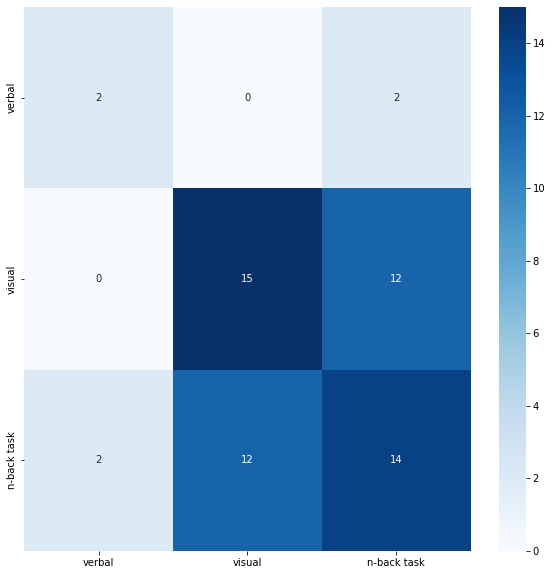

In [206]:
fig, ax = plt.subplots(figsize=(10, 10))
sn.heatmap(stmod_freq_wm, cmap="Blues",annot=True, fmt="d")
# plt.xticks(rotation=60)
plt.savefig("./images/heatmap_sel1_wm.png", dpi=300)

## Reward magnitude and type

In [94]:
df_reward = df_data[~mask_wm]

In [95]:
df_reward['title'].unique().size

46

In [96]:
df_reward_proc = df_proc.df_process(df_reward)
df_reward_proc.head(1)

,title,author,Number of Foci,Number of Subjects,contrast_set,keywords_split
0,A functional neuroimaging study of m...,Taylor et al,18,12,{-},"{decision phase, n-back task, visual..."


### Contrast reward

In [97]:
list_contrast_reward = list(df_proc.list_of_sets_to_set(df_reward_proc, 'contrast_set'))
counter_contrast_reward = data_util.df_counter(df=df_reward_proc.explode('contrast_set'), column='contrast_set',
                                           set_keywords=list_contrast_reward, order=1)
counter_contrast_reward

{'>nan_values<': 0,
 'lose > no reward': 1,
 'response switch > response maintenance': 1,
 'risky gambles > safe gambles': 1,
 'monetary reward magnitude': 1,
 'loss after winning streak > l1': 1,
 'small incentives > baseline': 1,
 'monetary reward > social reward': 1,
 'erotic reward > monetary reward': 1,
 'task switching > control task': 1,
 'all w > all l': 1,
 'anticipation phase': 1,
 'win after losing streak > w1': 1,
 'all female faces > all male faces': 1,
 'penalty during run of failure': 1,
 'choice > no choice': 1,
 'high reward > high loss': 1,
 'punishment > no reward': 1,
 'disadvantageous > advantageous': 1,
 'high-calorie > low-calorie': 1,
 'ar; sr > neutral activity': 1,
 'negative correlation with reward level': 1,
 'punishment > reward': 1,
 'social reward > monetary reward': 1,
 'response maintenance > response switch': 1,
 'social reward magnitude': 1,
 'inhibiton task > control task': 1,
 'safe > risk': 1,
 'beautiful female > beautiful male': 1,
 'beautiful ma

In [98]:
# chosen set of contrast
min_val = 4
list_contrast_selection_reward = list(set([key for key in list_contrast_reward if counter_contrast_reward[key] >= min_val]))
# create new col with only selected contrasts
df_reward_proc['selected_contrast'] = df_reward_proc['contrast_set'].apply(
    lambda x: set(x).intersection(list_contrast_selection_reward))

contrast_bool_reward = df_proc.boolean_df(df_reward_proc['selected_contrast'], list_contrast_selection_reward)
contrast_int_reward = contrast_bool_reward.astype(int)
contrast_freq_mat_reward = np.dot(contrast_int_reward.T, contrast_int_reward)

In [99]:
contrast_freq_reward = pd.DataFrame(contrast_freq_mat_reward, columns=list_contrast_selection_reward,
                                index=list_contrast_selection_reward)
# contrast_freq_reward

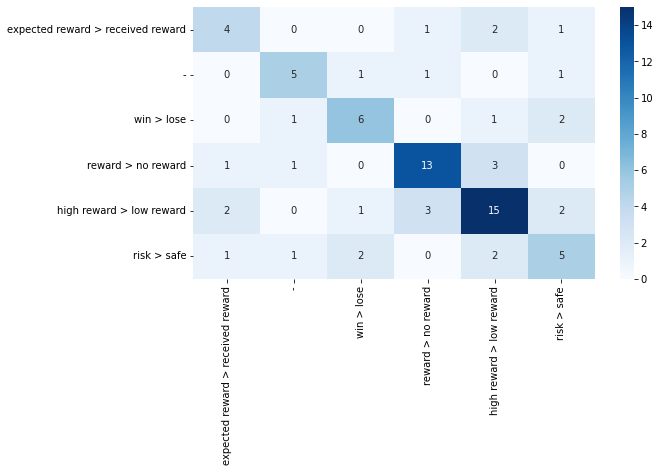

In [100]:
fig, ax = plt.subplots(figsize=(9, 5))
sn.heatmap(contrast_freq_reward, cmap="Blues",annot=True, fmt="d")
# plt.xticks(rotation=50)
plt.savefig("./images/heatmap_contrast_reward.png", dpi=300)


### Keywords reward

In [101]:
counter_keywords_reward = data_util.df_counter(df=df_reward_proc.explode('keywords_split'), column='keywords_split',
                                           set_keywords=df_proc.list_of_sets_to_set(df_reward_proc, 'keywords_split'),
                                           order=1)
counter_keywords_reward

{'>nan_values<': 0,
 'young': 1,
 'decreasing activation': 1,
 'movement': 1,
 'time effect': 1,
 'verbal reward': 1,
 'visual color pies with probabilities': 1,
 'potential loss': 1,
 'visual cue': 1,
 'erotic reward': 1,
 'increasing reward uncertainty': 1,
 'effect of reward': 1,
 'conditioning task': 1,
 'high calorie': 1,
 'probability': 1,
 'time conditioning': 1,
 'adult': 1,
 'fractal image': 1,
 'chocolate bars': 1,
 'small incentive': 1,
 'reinforcement learning': 1,
 'response maintenance': 1,
 'low calorie': 1,
 'cups task': 1,
 'Stroop task': 1,
 'response switching': 1,
 'negative expectancy': 1,
 'high incentive': 1,
 'extraversion': 1,
 'visual shape': 1,
 'dopamine': 1,
 'feedback reward': 1,
 'potential gain': 1,
 'increasing activation': 1,
 'anova': 1,
 'positive expectancy': 1,
 'inhibition': 1,
 'increasing reward magnitude': 1,
 'modelling prediction error': 1,
 'high vs low calorie food': 1,
 'visual shape color': 1,
 'safe choice': 1,
 'monetary and erotic rewa

### Obtain reduce list of keywords - rewards type

In [102]:
set_keywords_reward_type = set([el for el in df_proc.list_of_sets_to_set(df_reward_proc, 'keywords_split') if el.find('reward') != -1])
counter_keywords_reward_type = data_util.df_counter(df=df_reward_proc.explode('keywords_split'), column='keywords_split',
                                           set_keywords=set_keywords_reward_type,
                                           order=1)
counter_keywords_reward_type


{'>nan_values<': 0,
 'verbal reward': 1,
 'increasing reward uncertainty': 1,
 'increasing reward magnitude': 1,
 'effect of reward': 1,
 'feedback reward': 1,
 'monetary and erotic reward': 1,
 'erotic reward': 1,
 'taste reward': 2,
 'food photo reward': 2,
 'context-dependent reward': 3,
 'negative reward': 5,
 'social reward': 7,
 'positive reward': 11,
 'reward magnitude': 16,
 'reward value': 18,
 'monetary reward': 36}

### Check elements

In [103]:
############
check_set = ['reversal learning']
pd.set_option('display.max_colwidth', None)  # to show all the column values
mask = df_proc.check_column_elem(df=df_reward_proc,colummn_name='keywords_split',check_set=check_set)
df_reward_proc[mask]

,title,author,Number of Foci,Number of Subjects,contrast_set,keywords_split,selected_contrast
13,Determining a Role for Ventromedial Prefrontal Cortex in Encoding Action-Based Value Signals During Reward-Related Decision Making,Glascher et al,20,20,"{ar switch > stay and sr switch > stay, ar; sr > neutral activity}","{outcome phase, task switching, fractal image, MNI, monetary reward, decision making, reinforcement learning, reversal learning, fMRI}",{}
42,Role of the Medial Prefrontal Cortex in Impaired Decision Making in Juvenile Attention-Deficit-Hyperactivity Disorder,Hauser et al,12,20,{expected reward > received reward and control > adhd},"{outcome phase, visual object, task switching, MNI, monetary reward, decision making, reversal learning, fMRI}",{}


In [104]:
pd.set_option('display.max_colwidth', 40)
#############

### Obtain reduce list of keywords

In [105]:
set_keywords = df_proc.list_of_sets_to_set(df_reward_proc, 'keywords_split').difference(set_keywords_reward_type)
set_keywords

{'Balloon Analog Risk Task',
 'MID',
 'MNI',
 'SID',
 'Stroop task',
 'adult',
 'anova',
 'anticipation phase',
 'chocolate bars',
 'conditioning task',
 'cups task',
 'decision making',
 'decision phase',
 'decreasing activation',
 'dopamine',
 'extraversion',
 'fMRI',
 'face stimuli',
 'food',
 'fractal image',
 'gambling',
 'high calorie',
 'high gain vs high loss',
 'high incentive',
 'high vs low calorie food',
 'increasing activation',
 'inhibition',
 'low calorie',
 'modelling prediction error',
 'movement',
 'n-back task',
 'negative expectancy',
 'outcome phase',
 'passive',
 'performance-dependent',
 'positive expectancy',
 'potential gain',
 'potential loss',
 'probability',
 'reinforcement learning',
 'response maintenance',
 'response switching',
 'reversal learning',
 'risk choice',
 'safe choice',
 'small incentive',
 'talairach',
 'task switching',
 'time conditioning',
 'time effect',
 'viewing',
 'visual cards',
 'visual color pies with probabilities',
 'visual cue',


In [106]:
set_reward_type = {
    'erotic reward',
    'verbal reward',
    'monetary and erotic reward',
    'feedback reward',
    'taste reward',
    'context-dependent reward',  # maybe get it out
    'social reward',
    'food photo reward',
    'monetary reward'}

set_reward_contingency = {
    # 'viewing',  ## should be where is passive
    'passive',
    'gambling',
    'performance-dependent',
    'reversal learning',
    'n-back task'  # check this
}

set_reward_phase = {
    'anticipation phase',
    'decision phase',
    'outcome phase',
}

set_reward_decision_making = {
    'decision making'
}

In [217]:
set_reward_influence = {
    'negative reward',
    'positive reward',
}
set_keywords_others = {
    'safe choice',
    'risk choice',
    'positive expectancy',
    'negative expectancy',
}

# list_keywords_rewards = [set_reward_type,set_reward_contingency,set_reward_phase,set_reward_decision_making,set_reward_influence,set_keywords_others]
# set_keywords_selection_reward = set().union(*list_keywords_rewards)
# set_keywords_selection_reward
## Keep order
list_keywords_rewards = list(set_reward_type) + list(set_reward_contingency) + list(set_reward_phase) + list(set_reward_decision_making) + list(set_reward_influence) + list(set_keywords_others)
list_keywords_rewards

['context-dependent reward',
 'verbal reward',
 'taste reward',
 'social reward',
 'food photo reward',
 'feedback reward',
 'monetary reward',
 'monetary and erotic reward',
 'erotic reward',
 'passive',
 'n-back task',
 'gambling',
 'performance-dependent',
 'reversal learning',
 'anticipation phase',
 'outcome phase',
 'decision phase',
 'decision making',
 'negative reward',
 'positive reward',
 'risk choice',
 'safe choice',
 'positive expectancy',
 'negative expectancy']

In [218]:
# Filter the keywords based on min value of appearances
min_val = 5
# list_keywords_selection_reward = list(set([key for key in list_keywords_rewards if counter_keywords_reward[key] >= min_val]))
list_keywords_selection_reward = [key for key in list_keywords_rewards if counter_keywords_reward[key] >= min_val]
# create new col with only selected keywords
df_reward_proc['selected_keywords'] = df_reward_proc['keywords_split'].apply(
    lambda x: set(x).intersection(list_keywords_selection_reward))

keywords_bool_reward = df_proc.boolean_df(df_reward_proc['selected_keywords'], list_keywords_selection_reward)
keywords_int_reward = keywords_bool_reward.astype(int)
keywords_freq_mat_reward = np.dot(keywords_int_reward.T, keywords_int_reward)

In [219]:
keywords_freq_reward = pd.DataFrame(keywords_freq_mat_reward, columns=list_keywords_selection_reward,
                                index=list_keywords_selection_reward)
# keywords_freq_reward

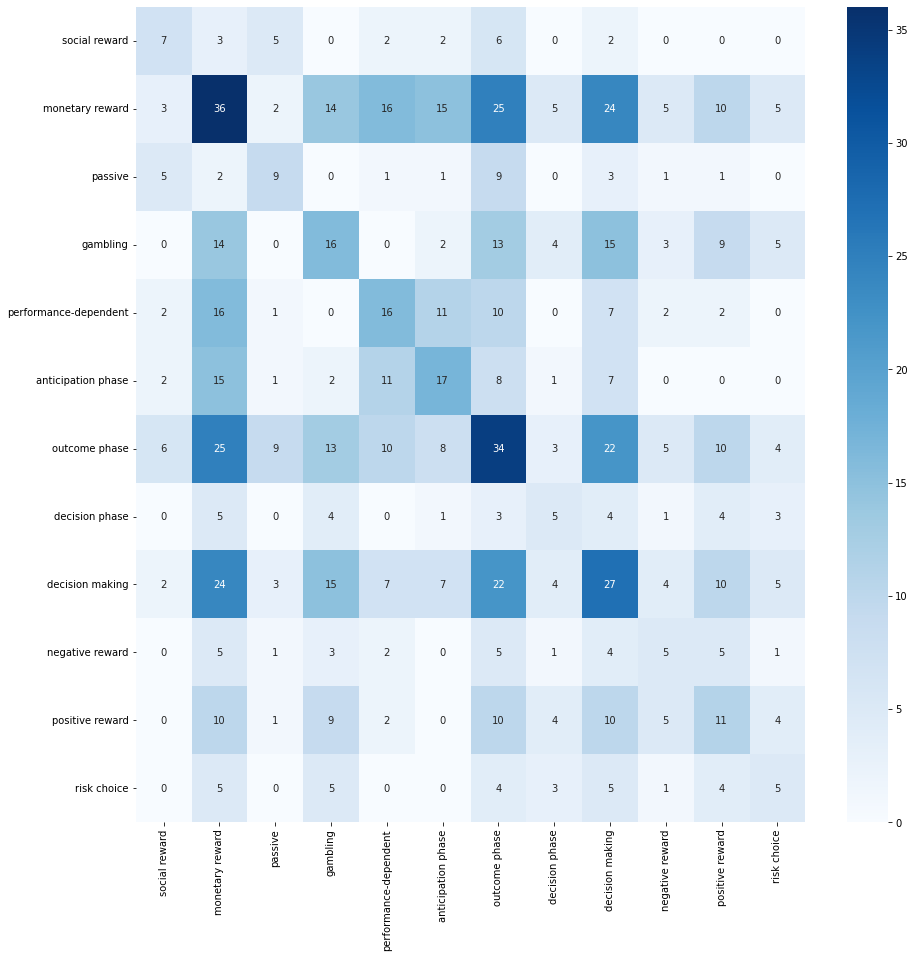

In [220]:
fig, ax = plt.subplots(figsize=(15, 15))
sn.heatmap(keywords_freq_reward, cmap="Blues",annot=True, fmt="d")
plt.savefig("./images/heatmap_keywords_reward.png", dpi=300)

### Keywords and Contrast reward

In [221]:
list_cnt_key_selection_reward = list_contrast_selection_reward + list(list_keywords_selection_reward)
cnt_key_int_reward = pd.merge(contrast_int_reward, keywords_int_reward, left_index=True, right_index=True).astype(int)
cnt_key_freq_mat_reward = np.dot(cnt_key_int_reward.T, cnt_key_int_reward)

In [222]:
cnt_key_freq_reward = pd.DataFrame(cnt_key_freq_mat_reward, columns=list_cnt_key_selection_reward, index=list_cnt_key_selection_reward)

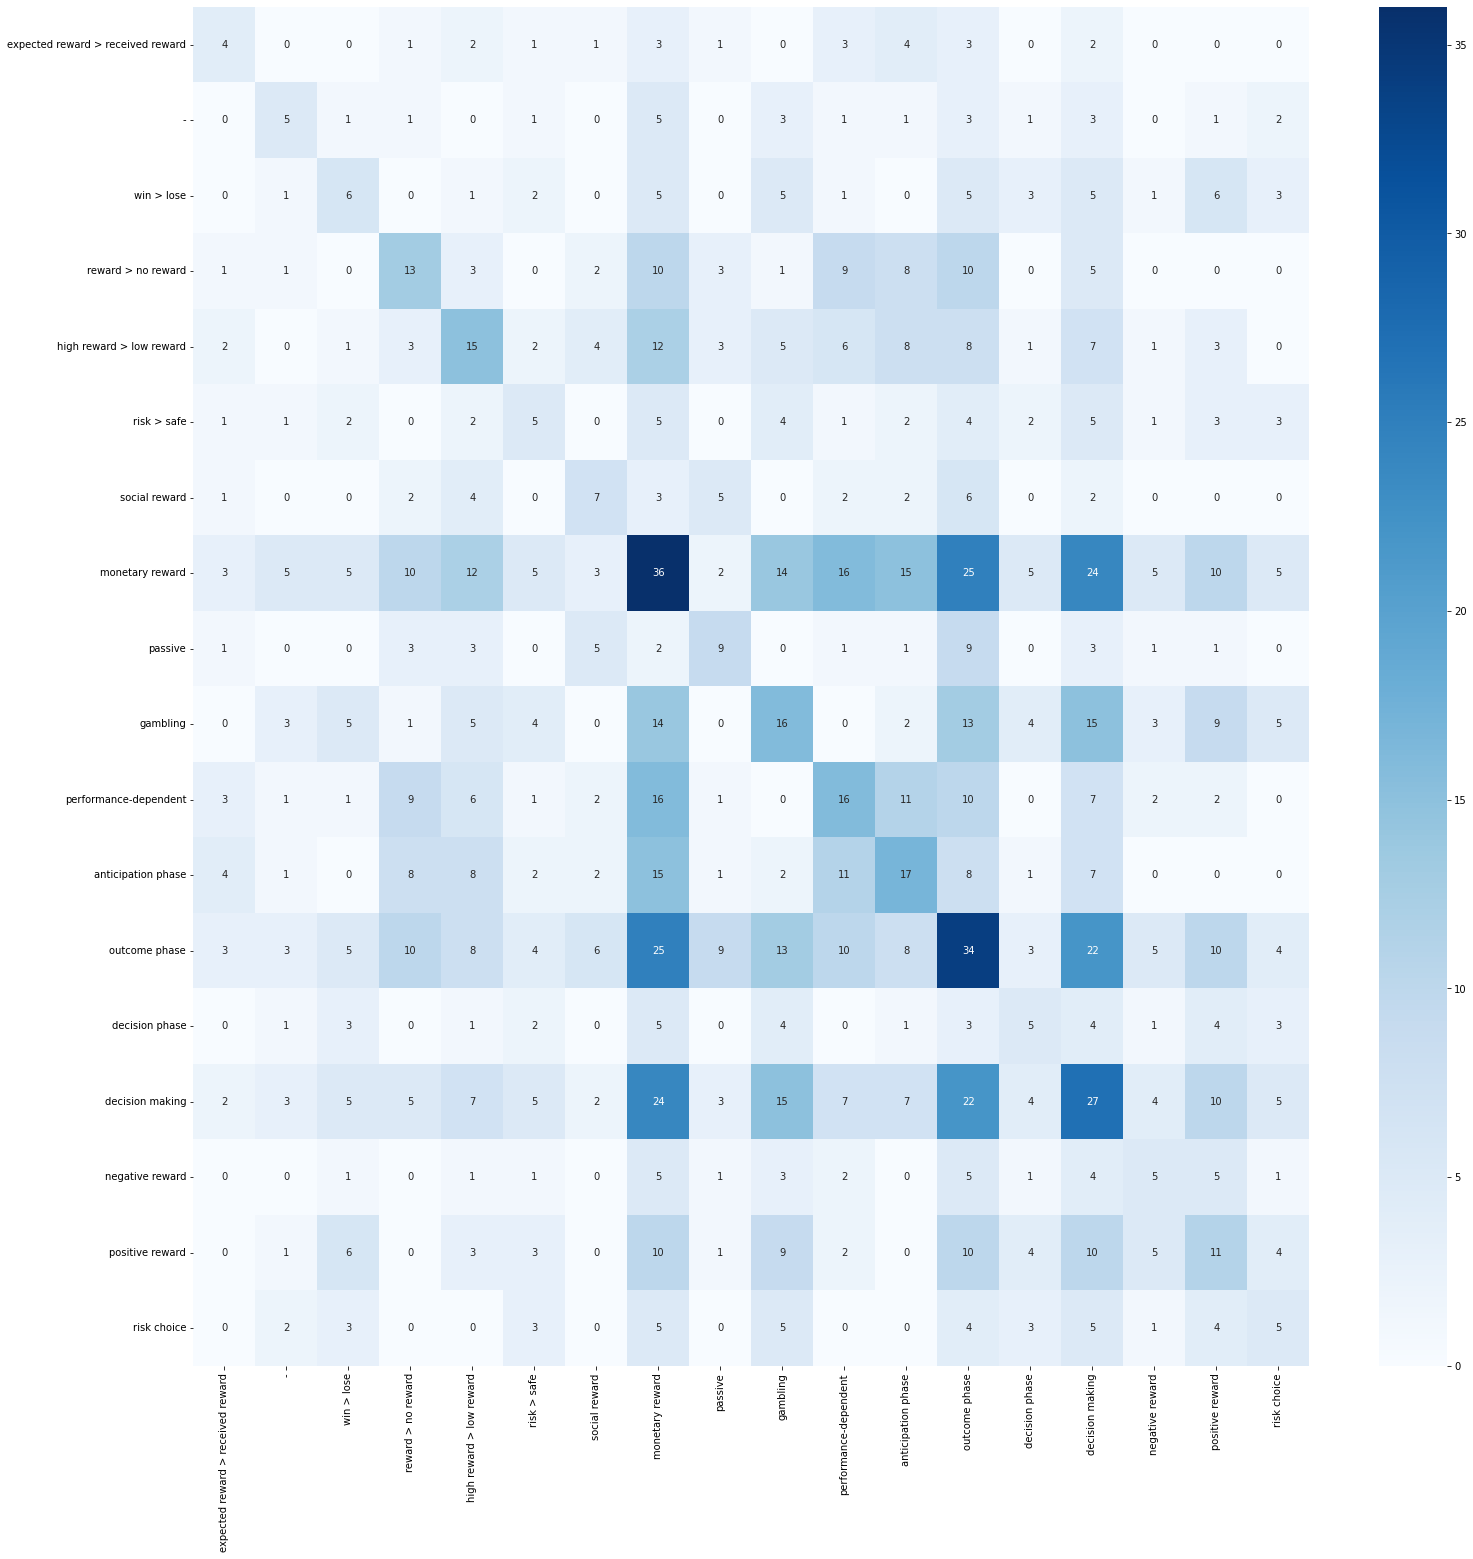

In [225]:
fig, ax = plt.subplots(figsize=(25, 25))
sn.heatmap(cnt_key_freq_reward, cmap="Blues",annot=True, fmt="d")
# plt.xticks(rotation=60)
plt.savefig("./images/heatmap_cnt_key_reward.png", dpi=300)